<a href="https://colab.research.google.com/github/jcmachicao/pucp_energy__erasmus_modulos/blob/main/psicrometria_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

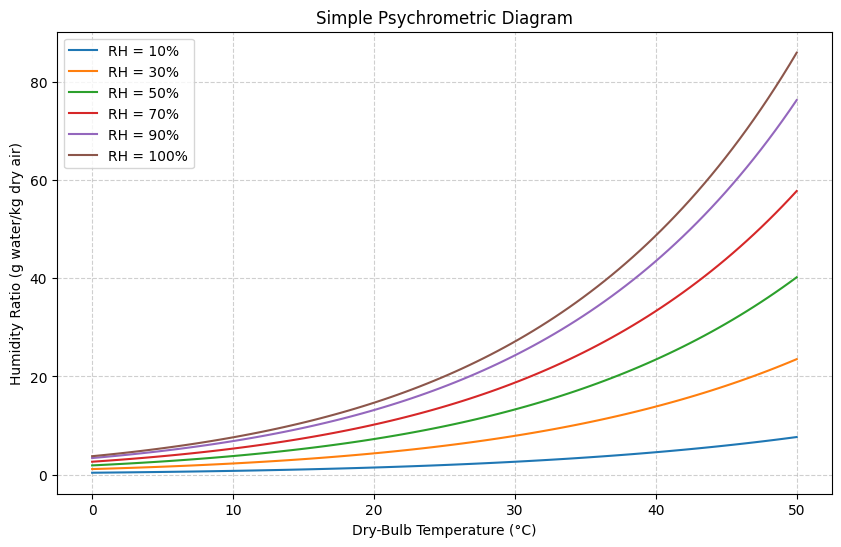

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
P_ATM = 101.325  # Atmospheric pressure in kPa
MW_WATER = 18.015  # Molar mass of water (g/mol)
R = 8.314  # Universal gas constant (J/(mol*K))
T_C_TO_K = 273.15

# Antoine equation constants for water
A = 8.07131
B = 1730.63
C = 233.426

# Helper functions
def saturation_pressure(temp_c):
    """
    Calculate the saturation pressure using Antoine equation (kPa)
    """
    return 10 ** (A - B / (temp_c + C)) * 0.133322


def humidity_ratio(P_ws, RH, P_atm=P_ATM):
    """
    Calculate the humidity ratio given the saturation pressure, RH, and atmospheric pressure
    """
    return 0.622 * (RH * P_ws / (P_atm - RH * P_ws))


# Plotting parameters
temp_range = np.linspace(0, 50, 100)  # Dry-bulb temperature range (0 to 50 C)

# Create figure and axis
plt.figure(figsize=(10, 6))
plt.title("Simple Psychrometric Diagram")
plt.xlabel("Dry-Bulb Temperature (°C)")
plt.ylabel("Humidity Ratio (g water/kg dry air)")

# Plot RH curves
for RH in [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]:
    humidity_ratios = []
    for temp_c in temp_range:
        P_ws = saturation_pressure(temp_c)  # Saturation pressure at this temperature
        W = humidity_ratio(P_ws, RH)
        humidity_ratios.append(W * 1000)  # Convert to g/kg
    plt.plot(temp_range, humidity_ratios, label=f"RH = {int(RH * 100)}%")

# Legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
